<a href="https://colab.research.google.com/github/seepala98/EIP_PHASE_1/blob/master/EIP_4_PHASE_1_1st_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


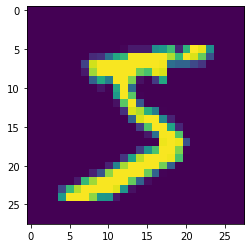

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [5]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
print(X_train.shape)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.BatchNormalization())

model.add(Convolution2D(16, 3, activation='relu'))
model.add(keras.layers.BatchNormalization())

model.add(Convolution2D(32, 3, activation='relu'))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(10, 3, activation='relu')) 
model.add(keras.layers.BatchNormalization())

model.add(Convolution2D(10, 3, activation='relu'))  
model.add(keras.layers.BatchNormalization())

model.add(Convolution2D(10, 3, activation='relu'))
model.add(keras.layers.BatchNormalization())

model.add(Convolution2D(10, 5))
model.add(keras.layers.BatchNormalization())
# # model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
# # model.add(Convolution2D(10, 13))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.


In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 32)        4640      
_________________________________________________________________
batch_normalization_3 (Batch (None, 22, 22, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)       

In [13]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [14]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.




Epoch 1/10
60000/60000 [==============================] - 40s 664us/step - loss: 0.3826 - acc: 0.9321
Epoch 2/10
60000/60000 [==============================] - 35s 589us/step - loss: 0.1402 - acc: 0.9730
Epoch 3/10
60000/60000 [==============================] - 35s 589us/step - loss: 0.0985 - acc: 0.9784
Epoch 4/10
60000/60000 [==============================] - 35s 589us/step - loss: 0.0748 - acc: 0.9829
Epoch 5/10
60000/60000 [==============================] - 35s 590us/step - loss: 0.0624 - acc: 0.9852
Epoch 6/10
60000/60000 [==============================] - 35s 587us/step - loss: 0.0527 - acc: 0.9868
Epoch 7/10
60000/60000 [==============================] - 35s 586us/step - loss: 0.0465 - acc: 0.9884
Epoch 8/10
60000/60000 [==============================] - 36s 594us/step - loss: 0.0411 - acc: 0.9896
Epoch 9/10
60000/60000 [==============================] - 35s 587us/step - loss: 0.0391 - acc: 0.9900
Epoch 10/10
60000/60000 [==============================] - 35s 586us/step - loss

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [16]:
print(score)

[0.03320866822060198, 0.9919]


In [0]:
y_pred = model.predict(X_test)

In [18]:
print(y_pred[:9])
print(y_test[:9])

[[2.0932046e-05 1.8959909e-04 6.0655300e-05 1.5910411e-04 2.7132421e-05
  3.4982182e-05 4.5983863e-05 9.9941826e-01 1.6173644e-05 2.7237109e-05]
 [2.6593911e-05 6.7682930e-05 9.9964809e-01 2.3562989e-05 2.3118790e-05
  2.7853386e-07 7.8318983e-05 1.1596468e-05 3.7702815e-05 8.3013583e-05]
 [9.3354494e-05 9.9958962e-01 2.0415528e-05 4.3508498e-05 1.8399691e-05
  5.3924268e-05 4.4151446e-05 3.4765264e-05 3.0438925e-05 7.1553077e-05]
 [9.9779701e-01 8.4152183e-05 2.0104772e-04 7.6326360e-05 8.2580038e-05
  2.5809451e-04 4.8769481e-04 3.2260461e-04 2.0761232e-04 4.8303136e-04]
 [1.1187447e-05 2.0867483e-05 7.0862811e-06 3.8530638e-06 9.9995089e-01
  8.9888988e-07 1.2953226e-06 8.8597051e-07 1.9281997e-06 1.0706062e-06]
 [1.1844349e-04 9.9951208e-01 4.6999849e-05 1.5676114e-05 3.4982895e-05
  5.8965357e-05 4.3169857e-05 5.5092318e-05 2.3651475e-05 9.0986461e-05]
 [2.1549515e-06 4.2175714e-05 2.5456125e-06 1.7270203e-06 9.9962866e-01
  4.4106055e-06 2.4108698e-05 2.4623916e-04 3.1538213e-05 

In [19]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
print(layer_dict)

{'conv2d_1': <keras.layers.convolutional.Conv2D object at 0x7ff4e726b588>, 'batch_normalization_1': <keras.layers.normalization.BatchNormalization object at 0x7ff4a7e6aef0>, 'conv2d_2': <keras.layers.convolutional.Conv2D object at 0x7ff4a756fe48>, 'batch_normalization_2': <keras.layers.normalization.BatchNormalization object at 0x7ff4a7552470>, 'conv2d_3': <keras.layers.convolutional.Conv2D object at 0x7ff4a00ab748>, 'batch_normalization_3': <keras.layers.normalization.BatchNormalization object at 0x7ff4a00cd048>, 'max_pooling2d_1': <keras.layers.pooling.MaxPooling2D object at 0x7ff4a00837b8>, 'conv2d_4': <keras.layers.convolutional.Conv2D object at 0x7ff4a00d2358>, 'batch_normalization_4': <keras.layers.normalization.BatchNormalization object at 0x7ff4a00930b8>, 'conv2d_5': <keras.layers.convolutional.Conv2D object at 0x7ff4a0054a20>, 'batch_normalization_5': <keras.layers.normalization.BatchNormalization object at 0x7ff4a005e470>, 'conv2d_6': <keras.layers.convolutional.Conv2D object

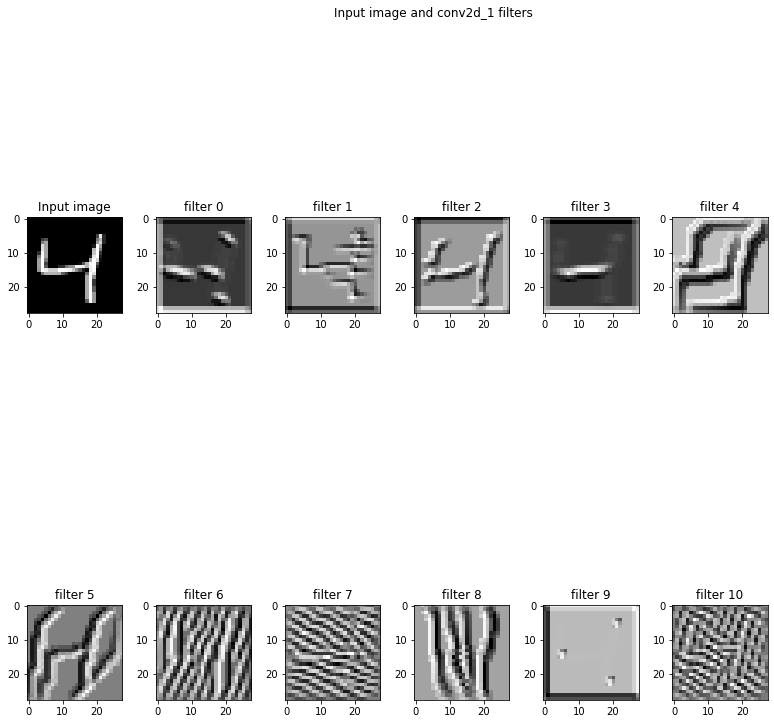

In [21]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64),
                      layer_name = 'conv2d_1'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()